In [126]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.metrics import pairwise_distances

In [127]:
data = pd.read_csv('Iris.csv')

In [128]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [129]:
# Extract numerical features
features = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

# Ensure the data is in a suitable format (numpy array)
point_cloud = np.array(features)

In [130]:
from ripser import Rips

rips = Rips(maxdim=2)

diagrams = rips.fit_transform(point_cloud)

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


In a Persistence diagram, the diagonal line represents the "topological noise" or "diagonal noise." This line tipically consists of points that lie close to the diagonal where the birth value is approximately equal to the death value. Points near to the diagonal tend to have short lifespans and indicate features that are not persistent across scales or dimensions. Features that deviate significantly from this diagonal line are considered more significant and indicate robust topological structures present in the dataset.

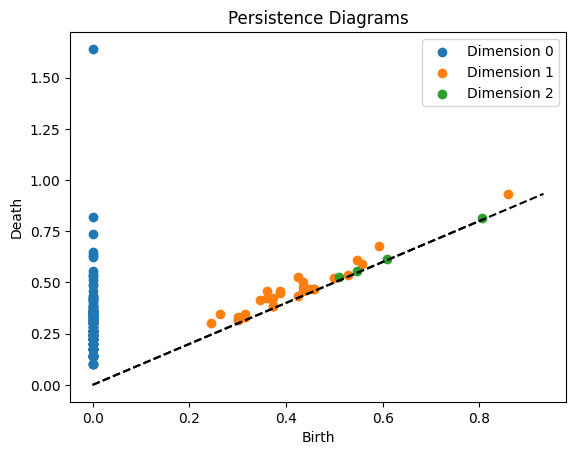

In [131]:
for dim, diagram in enumerate(diagrams):
    if len(diagram) > 0:
        plt.scatter(diagram[:, 0], diagram[:, 1], label=f'Dimension {dim}')
        
        # Calculate max_value for each diagram within the loop
        max_value = max(np.max(diagram[:, 0]), np.max(diagram[:, 1]))
        
        # Add a diagonal line for each diagram
        plt.plot([0, max_value], [0, max_value], color='black', linestyle='--')

plt.xlabel('Birth')
plt.ylabel('Death')
plt.title('Persistence Diagrams')
plt.legend()
plt.show()

In [132]:
# function to plot persistence diagrams
def plot_persistence_diagrams(diagrams):
    for dim, diagram in enumerate(diagrams):
        if len(diagram) > 0:
            plt.scatter(diagram[:, 0], diagram[:, 1], label=f'Dimension {dim}')
            
            # Calculate max_value for each diagram within the loop
            max_value = max(np.max(diagram[:, 0]), np.max(diagram[:, 1]))
            
            # Add a diagonal line for each diagram
            plt.plot([0, max_value], [0, max_value], color='black', linestyle='--')
    
    plt.xlabel('Birth')
    plt.ylabel('Death')
    plt.title('Persistence Diagrams')
    plt.legend()
    plt.show()


In [133]:
#function that counts the number of points in each dimension of the persistence diagram. 
#Points in dimension 0 correspond to connected components, dimension 1 corresponds to loops, and dimension 2 corresponds to cavities
def count_features_in_persistence_diagrams(diagrams):
    for dim, diagram in enumerate(diagrams):
        if len(diagram) > 0:
            # Count the number of points in each dimension
            num_points = len(diagram)
            
            # Determine the type of feature based on the dimension
            feature_type = "Connections" if dim == 0 else "Loops" if dim == 1 else "Cavities"
            
            # Print the number of points corresponding to the feature type
            print(f"Number of {feature_type}: {num_points}")

Different distance metrics

Employing various ways of measuring distances or similarities between data points when constructing the underlying simplicial complexes or persistence diagrams. Distance metrics define how "closeness" or "similarity" between points in a dataset is quantified. They play a crucial role in determining which pairs of points are connected and when topological features emerge and persist in the analysis.

In [134]:
distance_matrix_euclidean = pairwise_distances(point_cloud, metric='euclidean') #Euclidean distance
distance_matrix_manhattan = pairwise_distances(point_cloud, metric='manhattan') #Manhattan distance
distance_matrix_cosine = pairwise_distances(point_cloud, metric='cosine') #Cosine distance

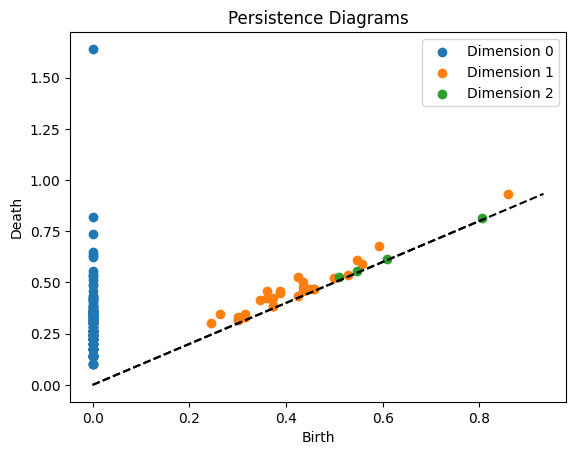

Number of Connections: 147
Number of Loops: 31
Number of Cavities: 4


In [135]:
diagrams_euclidean = rips.fit_transform(distance_matrix_euclidean, distance_matrix=True)
plot_persistence_diagrams(diagrams_euclidean)
count_features_in_persistence_diagrams(diagrams_euclidean)

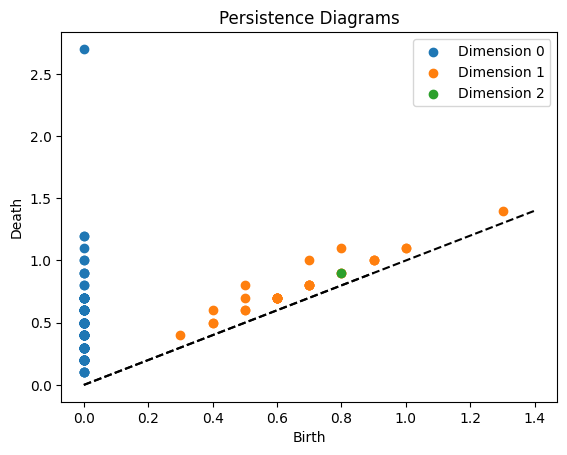

Number of Connections: 147
Number of Loops: 32
Number of Cavities: 1


In [136]:
diagrams_manhattan = rips.fit_transform(distance_matrix_manhattan, distance_matrix=True)
plot_persistence_diagrams(diagrams_manhattan)
count_features_in_persistence_diagrams(diagrams_manhattan)

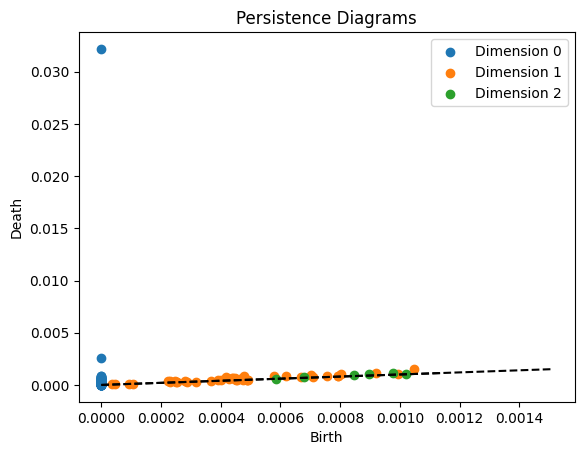

Number of Connections: 148
Number of Loops: 42
Number of Cavities: 6


In [137]:
diagrams_cosine = rips.fit_transform(distance_matrix_cosine, distance_matrix=True)
plot_persistence_diagrams(diagrams_cosine)
count_features_in_persistence_diagrams(diagrams_cosine)

Varying threshold values

It is going to help us explore how the persistence of topological features changes as we alter the sensitivity of the analysis. In persistent homology lower thresholds might reveal finer details or smaller-scale features in the data. This could identify more transient topological structures. On the other hand, increasing the threshold might merge smaller features or simplify the analysis emphasizing more prominent or stable structures in the data.

In [138]:
rip_low_thresh = Rips(maxdim=2, thresh=0.1) #lower threshold
diagrams_low_thresh = rip_low_thresh.fit_transform(point_cloud)

Rips(maxdim=2, thresh=0.1, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


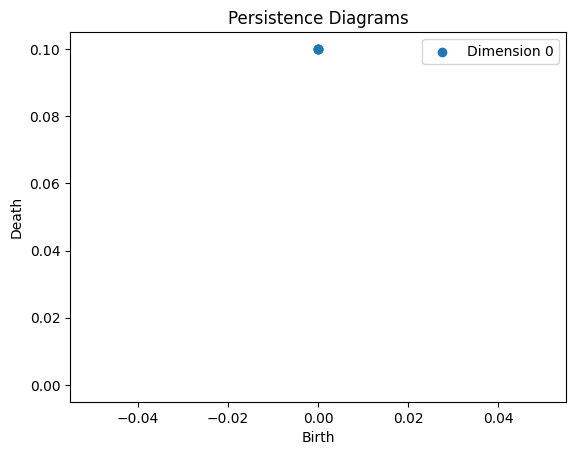

Number of Connections: 147


In [139]:
plot_persistence_diagrams(diagrams_low_thresh)
count_features_in_persistence_diagrams(diagrams_low_thresh)

In [140]:
rips_high_thresh = Rips(maxdim=2, thresh=1.0)  # Higher threshold
diagrams_high_thresh = rips_high_thresh.fit_transform(point_cloud)

Rips(maxdim=2, thresh=1.0, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


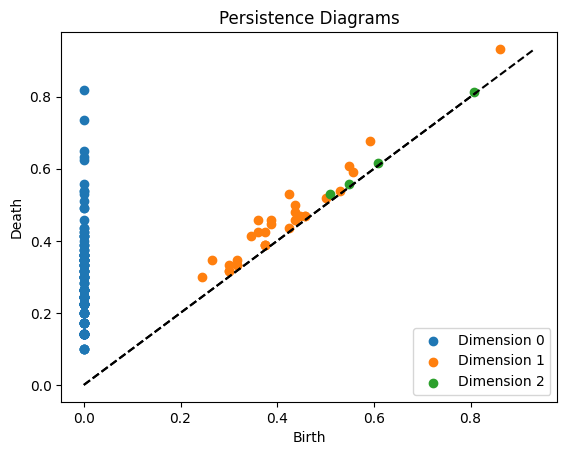

Number of Connections: 147
Number of Loops: 31
Number of Cavities: 4


In [141]:
plot_persistence_diagrams(diagrams_high_thresh)
count_features_in_persistence_diagrams(diagrams_high_thresh)